In [126]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import sklearn.metrics as metrics

pd.set_option('display.max_columns', None)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')



In [128]:
housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)
housing.shape

(2580, 81)

In [129]:
#housing.columns

In [130]:
housing.drop_duplicates(keep = "last", inplace=True)
housing.shape

(2579, 81)

In [131]:
missing = housing.isnull().sum().sort_values(ascending=False).head(25)
missing

PoolQC          2570
MiscFeature     2482
Alley           2411
Fence           2054
FireplaceQu     1241
LotFrontage      462
GarageFinish     129
GarageQual       129
GarageYrBlt      129
GarageCond       129
GarageType       127
BsmtExposure      71
BsmtFinType2      70
BsmtFinType1      69
BsmtCond          69
BsmtQual          69
MasVnrArea        14
MasVnrType        14
BsmtHalfBath       2
BsmtFullBath       2
GarageArea         1
GarageCars         1
Electrical         1
BsmtUnfSF          1
BsmtFinSF2         1
dtype: int64

In [132]:
missing/len(housing)*100

PoolQC          99.651028
MiscFeature     96.238852
Alley           93.485847
Fence           79.643273
FireplaceQu     48.119426
LotFrontage     17.913920
GarageFinish     5.001939
GarageQual       5.001939
GarageYrBlt      5.001939
GarageCond       5.001939
GarageType       4.924389
BsmtExposure     2.753005
BsmtFinType2     2.714230
BsmtFinType1     2.675456
BsmtCond         2.675456
BsmtQual         2.675456
MasVnrArea       0.542846
MasVnrType       0.542846
BsmtHalfBath     0.077549
BsmtFullBath     0.077549
GarageArea       0.038775
GarageCars       0.038775
Electrical       0.038775
BsmtUnfSF        0.038775
BsmtFinSF2       0.038775
dtype: float64

In [133]:
housing.drop(columns=['PoolQC','MiscFeature','Alley','Fence'], inplace=True)

In [134]:
housing['FireplaceQu']= housing['FireplaceQu'].fillna('None')
housing['GarageType']= housing['GarageType'].fillna('None')
housing['GarageFinish']= housing['GarageFinish'].fillna('None')
housing['GarageQual']= housing['GarageQual'].fillna('None')
housing['GarageCond']= housing['GarageCond'].fillna('None')
housing['BsmtQual']= housing['BsmtQual'].fillna('None')
housing['BsmtCond']= housing['BsmtCond'].fillna('None')
housing['BsmtExposure']= housing['BsmtExposure'].fillna('None')
housing['BsmtFinType1']= housing['BsmtFinType1'].fillna('None')
housing['BsmtFinType2']= housing['BsmtFinType2'].fillna('None')
housing['BsmtHalfBath']= housing['BsmtHalfBath'].fillna('None')
housing['BsmtFullBath']= housing['BsmtFullBath'].fillna('None')
housing['BsmtUnfSF']= housing['BsmtUnfSF'].fillna('None')
housing['BsmtFinSF1']= housing['BsmtFinSF1'].fillna('None')
housing['GarageCars']= housing['GarageCars'].fillna('None')
housing['BsmtFinSF2']= housing['BsmtFinSF2'].fillna('None')

In [135]:
housing["LotFrontage"].fillna(housing["LotFrontage"].median(), inplace=True)
housing['TotalBsmtSF'].fillna(housing['TotalBsmtSF'].median(), inplace=True)



In [136]:
housing["GarageYrBlt"].fillna(housing["GarageYrBlt"].mode()[0], inplace=True)
housing["MasVnrArea"].fillna(housing["MasVnrArea"].mode()[0], inplace=True)
housing["MasVnrArea"].fillna(housing["MasVnrArea"].mode()[0], inplace=True)
housing['GarageArea'].fillna(housing['GarageArea'].mode()[0], inplace=True)

In [137]:
housing['MasVnrType'] = housing['MasVnrType'].fillna(housing['MasVnrType'].value_counts().idxmax())
housing['Electrical'] = housing['Electrical'].fillna(housing['Electrical'].value_counts().idxmax())

In [138]:
housing.isnull().sum().sort_values(ascending=False).head(19)

PID             0
FullBath        0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
BsmtHalfBath    0
TotalBsmtSF     0
BsmtFullBath    0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
Electrical      0
CentralAir      0
HeatingQC       0
FireplaceQu     0
dtype: int64

In [139]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2579 entries, 1 to 763
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2579 non-null   int64  
 1   GrLivArea      2579 non-null   int64  
 2   SalePrice      2579 non-null   int64  
 3   MSSubClass     2579 non-null   int64  
 4   MSZoning       2579 non-null   object 
 5   LotFrontage    2579 non-null   float64
 6   LotArea        2579 non-null   int64  
 7   Street         2579 non-null   object 
 8   LotShape       2579 non-null   object 
 9   LandContour    2579 non-null   object 
 10  Utilities      2579 non-null   object 
 11  LotConfig      2579 non-null   object 
 12  LandSlope      2579 non-null   object 
 13  Neighborhood   2579 non-null   object 
 14  Condition1     2579 non-null   object 
 15  Condition2     2579 non-null   object 
 16  BldgType       2579 non-null   object 
 17  HouseStyle     2579 non-null   object 
 18  OverallQu

In [140]:
int_ = ["LotFrontage","GarageYrBlt","MasVnrArea"]
for col in int_:
    housing[col]  = housing[col] .astype("int64")

In [141]:
housing['Building Age'] = 2022 - housing['YearBuilt']
housing['Remod_Age'] = housing['YrSold'] - housing['YearRemodAdd']
housing['Garage_Age'] = housing['YrSold'] - housing['GarageYrBlt']
housing.drop(['YearRemodAdd','GarageYrBlt','YrSold'],1, inplace = True)

In [142]:
housing.drop(columns=['YearBuilt','BsmtFinSF1'], inplace=True)

In [143]:
housing['MoSold'] = housing['MoSold'].astype('object')
housing['GarageArea'] = housing['GarageArea'].astype('int')

In [144]:
#housing.info()

array([[<AxesSubplot:title={'center':'PID'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'SalePrice'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>],
       [<AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>],
       [<AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'HalfBath'}>],
       [<AxesSubplot:title={'center':'BedroomAbvGr'}>,
        <AxesSubplot:title={'center':'KitchenAbvGr'}>,
        <AxesSubplot:title={'center':'TotRmsAbvGrd'}>,
        <AxesSubplot:title={'center':'Fireplaces'}>

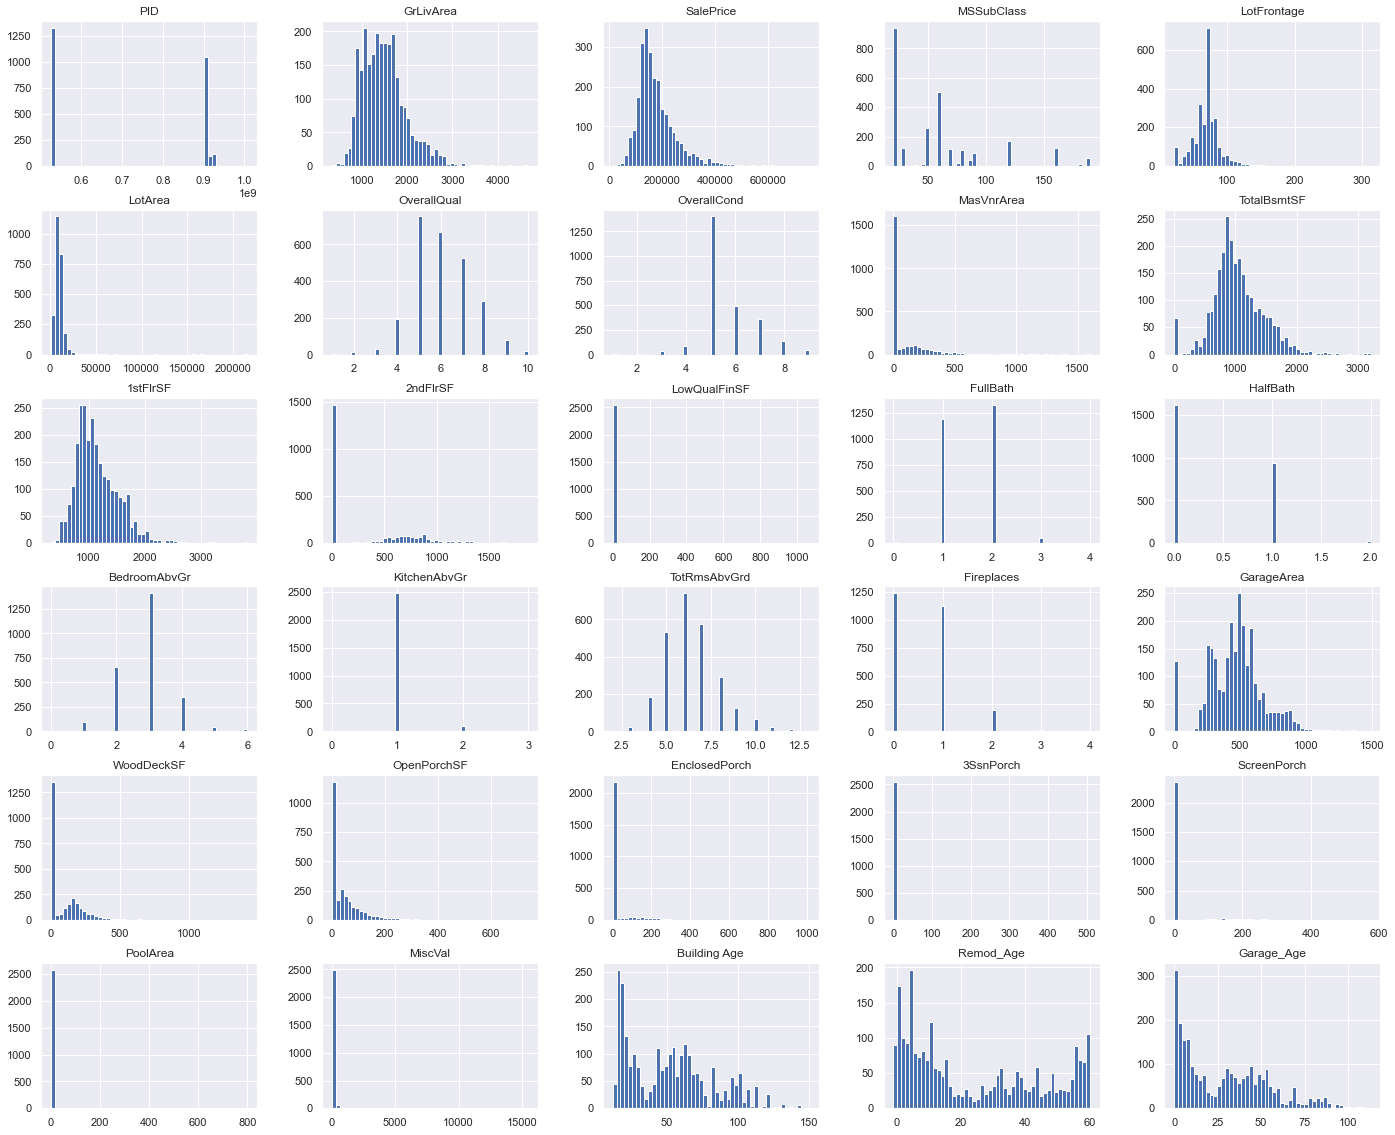

In [145]:
housing.hist(bins=50,figsize=(24,20))

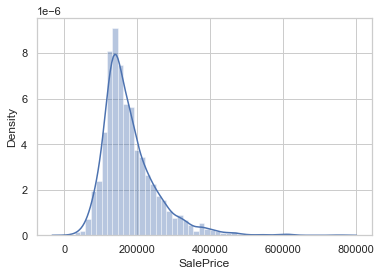

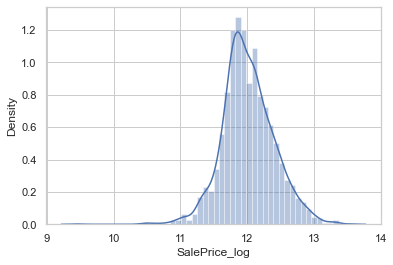

In [146]:
x = housing.SalePrice
sns.set_style('whitegrid')
sns.distplot(x)
plt.show()

housing['SalePrice_log'] = np.log(housing.SalePrice)
x = housing.SalePrice_log
sns.distplot(x)
plt.show()

In [147]:
housing['SalePrice'].describe()

count      2579.000000
mean     178053.442420
std       75044.983207
min       12789.000000
25%      129950.000000
50%      159900.000000
75%      209750.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

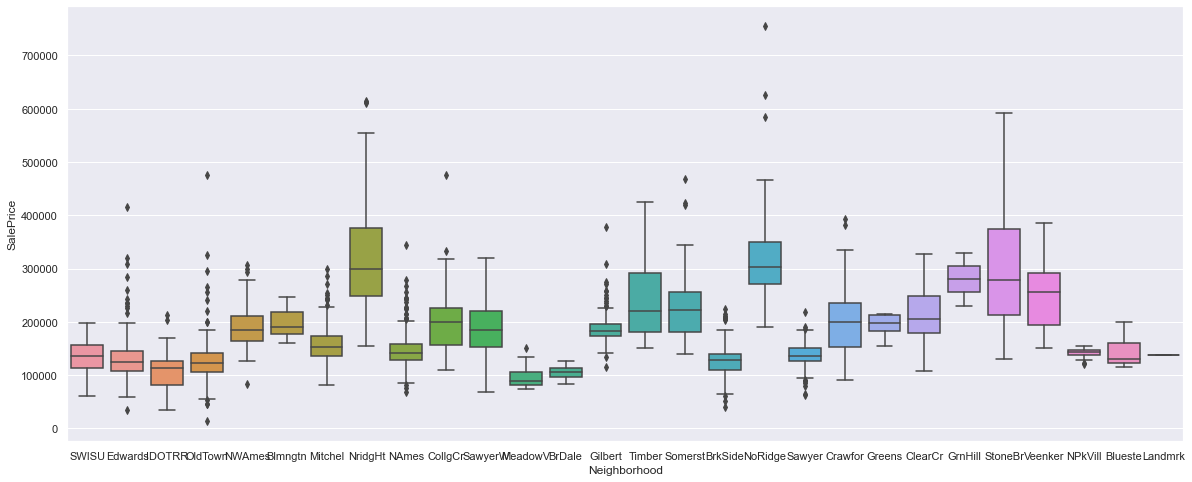

In [148]:
sns.set(rc={"figure.figsize":(20, 8)})
sns.boxplot(x="Neighborhood", y="SalePrice", data=housing)

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

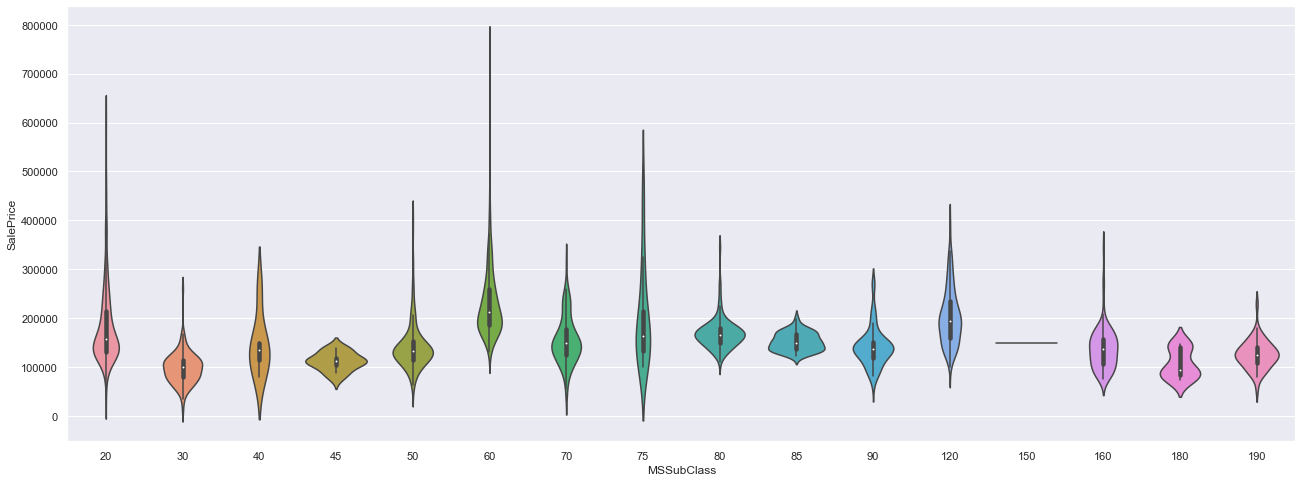

In [149]:
sns.set(rc={"figure.figsize":(22, 8)})
#sns.boxplot(x="MSSubClass", y="SalePrice", data=housing)
sns.violinplot(data=housing, x="MSSubClass", y="SalePrice")


<AxesSubplot:xlabel='SalePrice', ylabel='Neighborhood'>

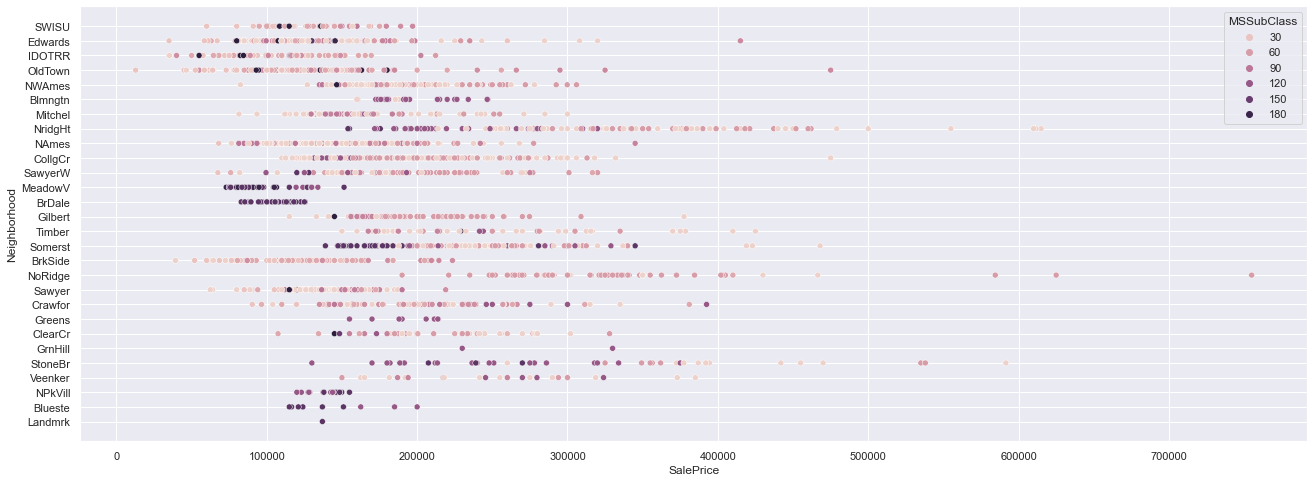

In [174]:
sns.scatterplot(data=housing, x="SalePrice", y="Neighborhood", hue="MSSubClass")

<AxesSubplot:xlabel='Building Age', ylabel='SalePrice'>

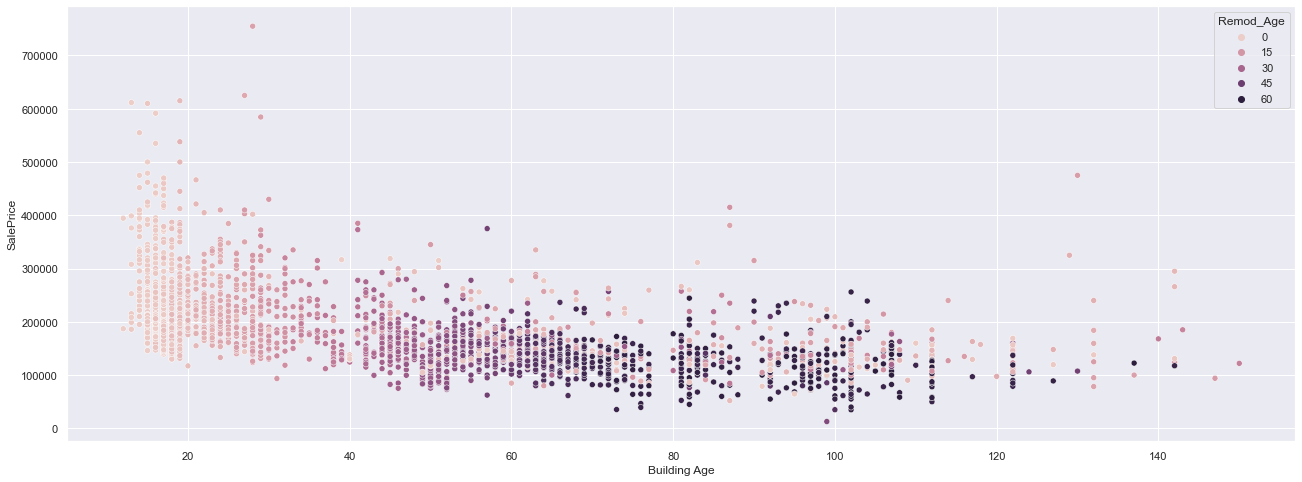

In [25]:
sns.scatterplot(data=housing, x="Building Age", y="SalePrice", hue="Remod_Age")

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

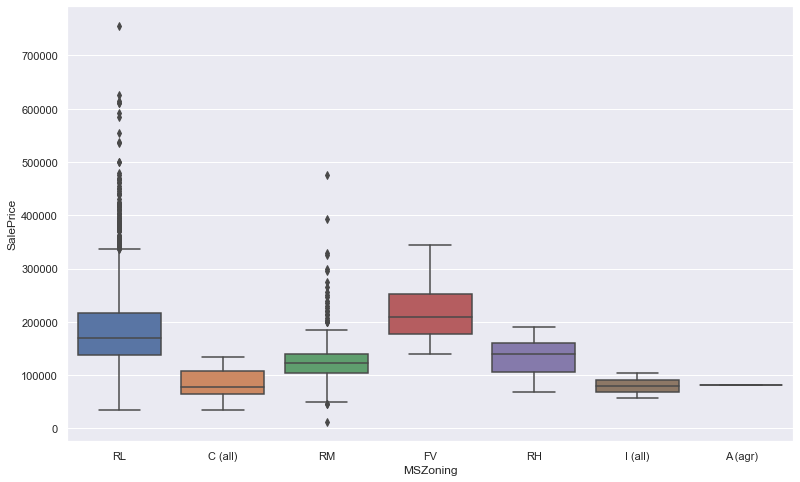

In [26]:
sns.set(rc={"figure.figsize":(13, 8)})
sns.boxplot(x="MSZoning", y="SalePrice", data=housing)

<AxesSubplot:xlabel='Condition1', ylabel='SalePrice'>

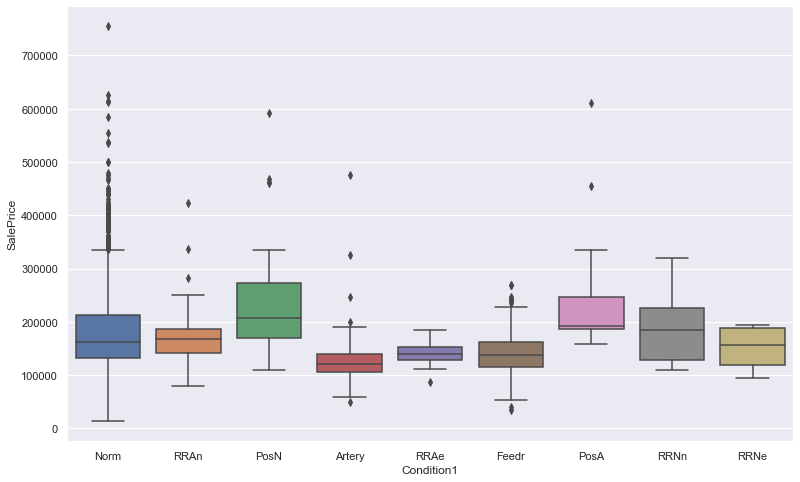

In [27]:
sns.set(rc={"figure.figsize":(13, 8)})
sns.boxplot(x="Condition1", y="SalePrice", data=housing)

<AxesSubplot:xlabel='Foundation', ylabel='SalePrice'>

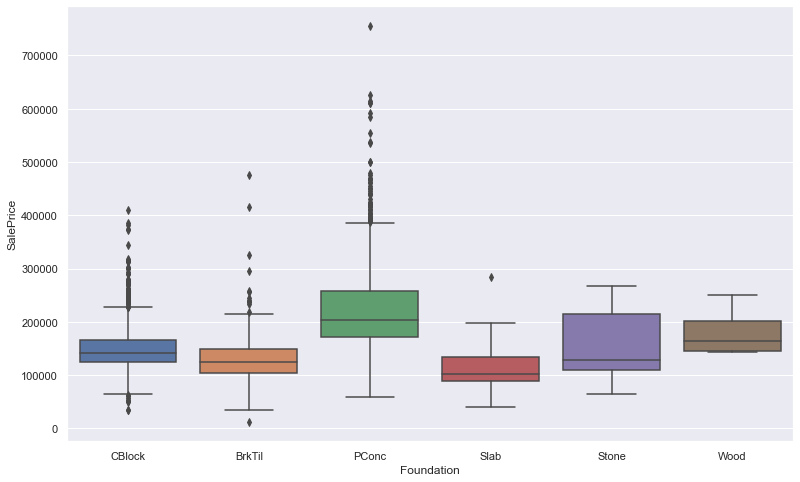

In [28]:
sns.set(rc={"figure.figsize":(13, 8)})
sns.boxplot(x="Foundation", y="SalePrice", data=housing)

<AxesSubplot:>

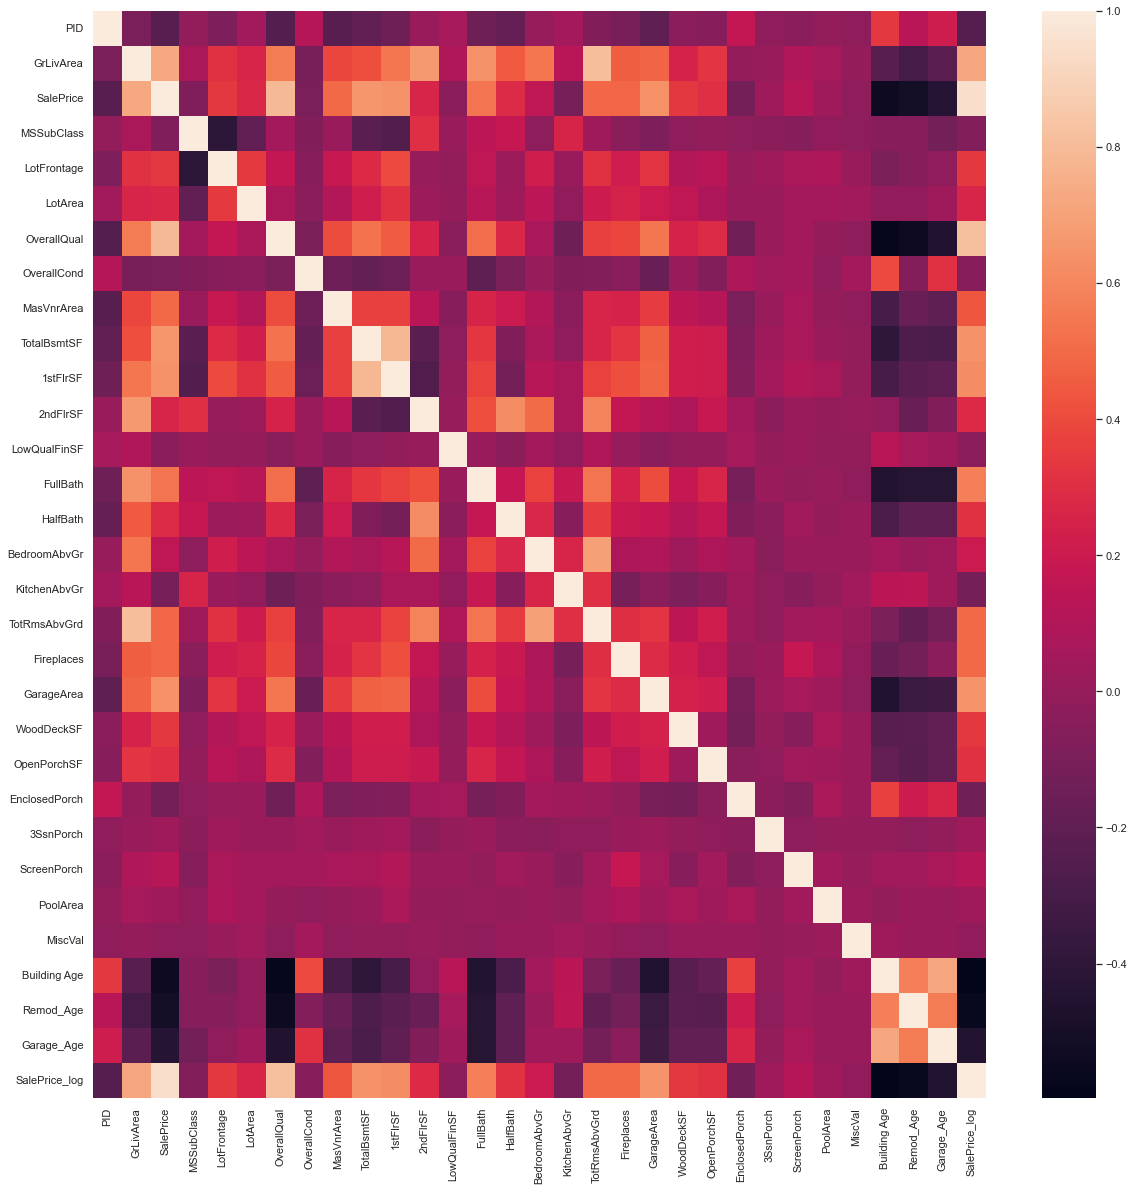

In [29]:
plt.figure(figsize=(20,20))
sns.heatmap(housing.corr())

In [30]:
housing.corr()['SalePrice_log'].sort_values(ascending=False)

SalePrice_log    1.000000
SalePrice        0.950057
OverallQual      0.816205
GrLivArea        0.717690
GarageArea       0.645370
TotalBsmtSF      0.641374
1stFlrSF         0.624023
FullBath         0.571335
Fireplaces       0.499483
TotRmsAbvGrd     0.498922
MasVnrArea       0.437109
WoodDeckSF       0.336350
LotFrontage      0.334109
OpenPorchSF      0.312170
HalfBath         0.309735
2ndFlrSF         0.277743
LotArea          0.261472
BedroomAbvGr     0.196679
ScreenPorch      0.119472
3SsnPorch        0.037608
PoolArea         0.032375
MiscVal         -0.013696
LowQualFinSF    -0.038240
OverallCond     -0.050813
MSSubClass      -0.070257
KitchenAbvGr    -0.122493
EnclosedPorch   -0.138610
PID             -0.237751
Garage_Age      -0.449580
Remod_Age       -0.564036
Building Age    -0.597492
Name: SalePrice_log, dtype: float64

In [31]:
#housing.corr()['SalePrice'].sort_values(ascending = False).keys()[1:7]
top_6_corr = housing[['GarageArea','OverallQual','GrLivArea','1stFlrSF','FullBath','Building Age','Remod_Age','MasVnrArea']]

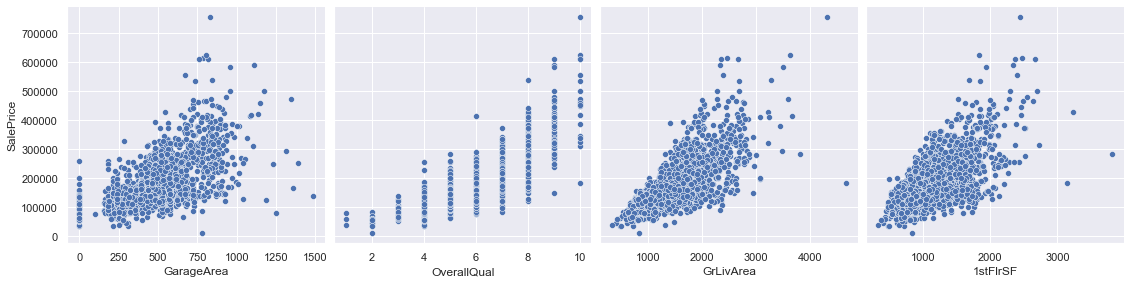

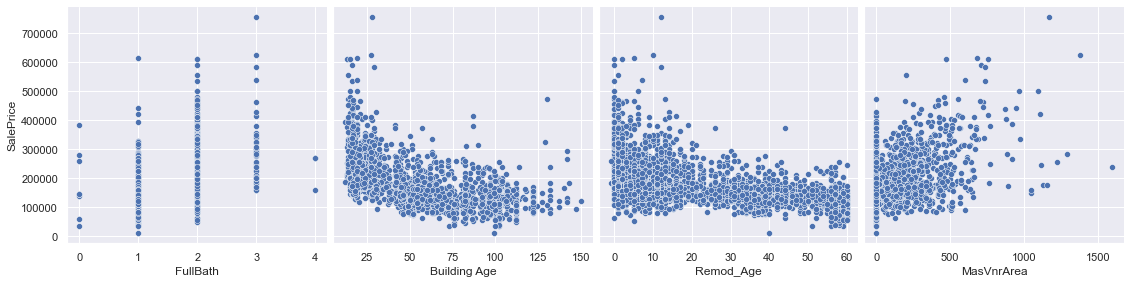

In [32]:
def pp(a,b,c,d):
    sns.pairplot(housing, x_vars=[a,b,c,d], y_vars='SalePrice',height=4, aspect=1, kind='scatter')
    plt.show()

pp('GarageArea','OverallQual', 'GrLivArea','1stFlrSF')
pp('FullBath','Building Age','Remod_Age','MasVnrArea')

In [33]:
housing['MSSubClass'] = housing['MSSubClass'].astype('object')
housing['TotalBsmtSF'] = housing['TotalBsmtSF'].astype('int')

In [34]:
category_features = housing.select_dtypes(include='object').columns
category_features

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [35]:
for col in list(category_features):
    print(housing[col].value_counts())

20     939
60     502
50     258
120    169
30     123
160    120
70     116
80     109
90      87
190     53
85      43
75      21
45      17
180     15
40       6
150      1
Name: MSSubClass, dtype: int64
RL         2007
RM          418
FV          113
RH           21
C (all)      17
I (all)       2
A (agr)       1
Name: MSZoning, dtype: int64
Pave    2569
Grvl      10
Name: Street, dtype: int64
Reg    1640
IR1     855
IR2      71
IR3      13
Name: LotShape, dtype: int64
Lvl    2337
Bnk      95
HLS      95
Low      52
Name: LandContour, dtype: int64
AllPub    2577
NoSewr       2
Name: Utilities, dtype: int64
Inside     1885
Corner      439
CulDSac     164
FR2          78
FR3          13
Name: LotConfig, dtype: int64
Gtl    2458
Mod     108
Sev      13
Name: LandSlope, dtype: int64
NAmes      410
CollgCr    236
OldTown    213
Edwards    165
Somerst    143
Gilbert    143
Sawyer     139
NWAmes     123
NridgHt    121
SawyerW    113
Mitchel    104
BrkSide    103
Crawfor     92
IDOTRR     

In [36]:
housing.drop(['Street','LandContour','Utilities','LandSlope','Condition2','BldgType','RoofMatl','BsmtCond','Heating','MoSold',
              'CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive','SaleType','ExterCond',
              'BsmtFinType2','BsmtFullBath','BsmtHalfBath','GarageCars',
              'BsmtFinSF2','BsmtUnfSF'], axis=1, inplace=True)


In [37]:
category_features

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [38]:
#MSZoning
housing = housing.replace({'MSZoning': {'C (all)':'Other', 'RH':'Other', 'FV':'Other'}})
mz = pd.get_dummies(housing['MSZoning'], prefix = 'MSZoning')
mz = mz.drop('MSZoning_Other', axis=1)
housing = pd.concat([housing, mz], axis=1)
housing = housing.drop('MSZoning', axis=1)

In [39]:
#BsmtQual
housing = housing.replace({'BsmtQual': {'No':'Other', 'Po':'Other'}})
lc = pd.get_dummies(housing['BsmtQual'], prefix = 'BsmtQual')
lc = lc.drop('BsmtQual_Other', axis=1)
housing = pd.concat([housing, lc], axis=1)
housing = housing.drop('BsmtQual', axis=1)

In [40]:
#LotConfig
housing = housing.replace({'LotConfig': {'CulDSac':'Other', 'FR2':'Other', 'FR3':'Other'}})
lc = pd.get_dummies(housing['LotConfig'], prefix = 'LotConfig')
lc = lc.drop('LotConfig_Other', axis=1)
housing = pd.concat([housing, lc], axis=1)
housing = housing.drop('LotConfig', axis=1)

In [41]:
#Neighborhood
housing = housing.replace({'Neighborhood': {'ClearCr':'Other', 'MeadowV':'Other', 'BrDale':'Other', 
                                            'Blmngtn':'Other', 'Veenker':'Other','NPkVill':'Other', 
                                            'Blueste':'Other', 'Greens':'Other', 'GrnHill':'Other','Landmrk':'Other'}})
nh = pd.get_dummies(housing['Neighborhood'], prefix = 'Neighborhood')
nh = nh.drop('Neighborhood_Other', axis=1)
housing = pd.concat([housing, nh], axis=1)
housing = housing.drop('Neighborhood', axis=1)

In [42]:
#Condition1
housing = housing.replace({'Condition1': {'RRNe':'Other', 'RRNn':'Other', 'PosA':'Other', 'RRAe':'Other', 'PosN':'Other',
                               'RRAn':'Other', 'Artery':'Other'}})
co = pd.get_dummies(housing['Condition1'], prefix = 'Condition1')
co = co.drop('Condition1_Other', axis=1)
housing = pd.concat([housing, co], axis=1)
housing = housing.drop('Condition1', axis=1)

In [43]:
#housestyle
housing = housing.replace({'HouseStyle': {'2.5Fin':'Other', '2.5Unf':'Other', '1.5Unf':'Other', 'SFoyer':'Other', 'SLvl':'Other'}}) 
hs = pd.get_dummies(housing['HouseStyle'], prefix = 'HouseStyle')
hs = hs.drop('HouseStyle_Other', axis=1)
housing = pd.concat([housing, hs], axis=1)
housing = housing.drop('HouseStyle', axis=1)


In [44]:
#overallcond
oc = pd.get_dummies(housing['OverallCond'], prefix = 'OverallCond')
housing = pd.concat([housing, oc], axis=1)
housing = housing.drop('OverallCond', axis=1)

In [45]:
#roofstyle
housing = housing.replace({'RoofStyle': {'Shed':'Other', 'Mansard':'Other', 'Gambrel':'Other', 'Flat':'Other'}})
rs = pd.get_dummies(housing['RoofStyle'], prefix = 'RoofStyle')
rs = rs.drop('RoofStyle_Other', axis=1)
housing = pd.concat([housing, rs], axis=1)
housing = housing.drop('RoofStyle', axis=1)

In [46]:
#exteriorl1st
housing = housing.replace({'Exterior1st': {'ImStucc':'Other', 'AsphShn':'Other', 'CBlock':'Other', 'BrkComm':'Other','Stone':'Other',
                              'AsbShng':'Other','Stucco':'Other','WdShing':'Other','BrkFace':'Other','CemntBd':'Other'}})
ex = pd.get_dummies(housing['Exterior1st'], prefix = 'Exterior1st')
ex = ex.drop('Exterior1st_Other', axis=1)
housing = pd.concat([housing, ex], axis=1)
housing = housing.drop('Exterior1st', axis=1)

In [47]:
#Exterior2nd
housing = housing.replace({'Exterior2nd': {'CBlock':'Other', 'AsphShn':'Other', 'Stone':'Other', 'Brk Cmn':'Other','ImStucc':'Other',
                              'AsbShng':'Other','BrkFace':'Other','Stucco':'Other','Wd Shng':'Other','CmentBd':'Other'}})
ex2 = pd.get_dummies(housing['Exterior2nd'], prefix = 'Exterior2nd')
ex2 = ex2.drop('Exterior2nd_Other', axis=1)
housing = pd.concat([housing, ex2], axis=1)
housing = housing.drop('Exterior2nd', axis=1)

In [48]:
# MasVnrType
mv = pd.get_dummies(housing['MasVnrType'], prefix = 'MasVnrType')
mv = mv.drop('MasVnrType_BrkCmn', axis=1)
housing = pd.concat([housing, mv], axis=1)
housing = housing.drop('MasVnrType', axis=1)


In [49]:
#ExterQual
housing = housing.replace({'ExterQual': {'Fa':'Other', 'Ex':'Other'}})
exq = pd.get_dummies(housing['ExterQual'], prefix = 'ExterQual')
exq = exq.drop('ExterQual_Other', axis=1)
housing = pd.concat([housing, exq], axis=1)
housing = housing.drop('ExterQual', axis=1)

In [50]:
#Foundation
housing = housing.replace({'Foundation': {'Wood':'Other', 'Stone':'Other','Slab':'Other'}})
fo = pd.get_dummies(housing['Foundation'], prefix = 'Foundation')
fo = fo.drop('Foundation_Other', axis=1)
housing = pd.concat([housing, fo], axis=1)
housing = housing.drop('Foundation', axis=1)

In [51]:
# BsmtExposure
be = pd.get_dummies(housing['BsmtExposure'], prefix = 'BsmtExposure')
be = be.drop('BsmtExposure_None', axis=1)
housing = pd.concat([housing, be], axis=1)
housing = housing.drop('BsmtExposure', axis=1)

In [52]:
# BsmtFinType1
bf = pd.get_dummies(housing['BsmtFinType1'], prefix = 'BsmtFinType1')
bf = bf.drop('BsmtFinType1_None', axis=1)
housing = pd.concat([housing, bf], axis=1)
housing = housing.drop('BsmtFinType1', axis=1)

In [53]:
#KitchenQual
housing = housing.replace({'KitchenQual': {'Fa':'Other', 'Po':'Other'}})
kq = pd.get_dummies(housing['KitchenQual'], prefix = 'KitchenQual')
kq = kq.drop('KitchenQual_Other', axis=1)
housing = pd.concat([housing, kq], axis=1)
housing = housing.drop('KitchenQual', axis=1)

In [54]:
#lotshape
housing = housing.replace({'LotShape': {'IR2':'Other', 'IR3':'Other'}})
ls = pd.get_dummies(housing['LotShape'], prefix = 'LotShape')
ls = ls.drop('LotShape_Other', axis=1)
housing = pd.concat([housing, ls], axis=1)
housing = housing.drop('LotShape', axis=1)

In [55]:
#FireplaceQu
housing = housing.replace({'FireplaceQu': {'Fa':'Other', 'Ex':'Other','Po':'Other'}})
fq = pd.get_dummies(housing['FireplaceQu'], prefix = 'FireplaceQu')
fq = fq.drop('FireplaceQu_Other', axis=1)
housing = pd.concat([housing, fq], axis=1)
housing = housing.drop('FireplaceQu', axis=1)

In [56]:
#GarageType
housing = housing.replace({'GarageType': {'2Types':'Other', 'CarPort':'Other','Basment':'Other'}})
gt = pd.get_dummies(housing['GarageType'], prefix = 'GarageType')
gt = gt.drop('GarageType_Other', axis=1)
housing = pd.concat([housing, gt], axis=1)
housing = housing.drop('GarageType', axis=1)

In [57]:
#GarageFinish
gf = pd.get_dummies(housing['GarageFinish'], prefix = 'GarageFinish')
gf = gf.drop('GarageFinish_None', axis=1)
housing = pd.concat([housing, gf], axis=1)
housing = housing.drop('GarageFinish', axis=1)

In [58]:
#SaleCondition
housing = housing.replace({'SaleCondition': {'AdjLand':'Other', 'Alloca':'Other','Family':'Other'}})
se = pd.get_dummies(housing['SaleCondition'], prefix = 'SaleCondition')
se = se.drop('SaleCondition_Other', axis=1)
housing = pd.concat([housing, se], axis=1)
housing = housing.drop('SaleCondition', axis=1)

In [59]:
#MSSubClass
housing = housing.replace({'MSSubClass': {40:'Other', 180:'Other',45:'Other', 75:'Other',85:'Other',190:'Other',90:'Other',
                               80:'Other',70:'Other',160:'Other',30:'Other'}})
ms = pd.get_dummies(housing['MSSubClass'], prefix = 'MSSubClass')
ms = ms.drop('MSSubClass_Other', axis=1)
housing = pd.concat([housing, ms], axis=1)
housing = housing.drop('MSSubClass', axis=1)

In [60]:
#heatingQC
housing = housing.replace({'HeatingQC': {'Fa':'Other', 'Po':'Other'}})
hc = pd.get_dummies(housing['HeatingQC'], prefix = 'HeatingQC')
hc = hc.drop('HeatingQC_Other', axis=1)
housing = pd.concat([housing, hc], axis=1)
housing = housing.drop('HeatingQC', axis=1)

In [61]:
housing = housing.drop('PID', axis=1)
housing

,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Building Age,Remod_Age,Garage_Age,SalePrice_log,MSZoning_A (agr),MSZoning_I (all),MSZoning_RL,MSZoning_RM,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,LotConfig_Corner,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_TA,LotShape_IR1,LotShape_Reg,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_120,MSSubClass_150,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA
1,856,126000,68,7890,6,0,856,856,0,0,1,0,2,1,4,1,399,0,0,0,0,166,0,0,83,60,71,11.744037,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
2,1049,139500,42,4235,5,149,1049,1049,0,0,2,0,2,1,5,0,266,0,105,0,0,0,0,0,38,25,25,11.845820,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1
3,1001,124900,60,6060,5,0,837,1001,0,0,1,0,2,1,5,0,216,154,0,42,86,0,0,0,92,0,77,11.735269,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
4,1039,114000,80,8146,4,0,405,717,322,0,1,0,2,1,6,0,281,0,0,168,0,111,0,0,122,6,69,11.643954,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
5,1665,227000,70,8400,8,0,810,810,855,0,2,1,3,1,6,0,528,0,45,0,0,0,0,0,21,8,8,12.332705,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [62]:
housing1 = housing

In [63]:
#test-train split

In [64]:
housing1_train, housing1_test = train_test_split(housing1, train_size=0.8, test_size=0.2, random_state=100)
print(housing1_train.shape,housing1_test.shape)

(2063, 129) (516, 129)


In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numeric_cols = list(housing1_train.select_dtypes(include=['int64', 'float64']).columns)

housing1_train[numeric_cols] = scaler.fit_transform(housing1_train[numeric_cols])
housing1_train.head()

,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Building Age,Remod_Age,Garage_Age,SalePrice_log,MSZoning_A (agr),MSZoning_I (all),MSZoning_RL,MSZoning_RM,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,LotConfig_Corner,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_TA,LotShape_IR1,LotShape_Reg,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_120,MSSubClass_150,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA
481,0.142140,0.148490,0.262570,0.040022,0.444444,0.00000,0.269495,0.162364,0.000000,0.0,0.25,0.0,0.500000,0.333333,0.363636,0.25,0.193548,0.122893,0.194070,0.000000,0.0,0.0,0.0,0.0,0.318519,0.655738,0.345133,0.555058,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
104,0.541436,0.613318,0.357542,0.060162,0.888889,0.12375,0.766687,0.618474,0.000000,0.0,0.50,0.0,0.333333,0.333333,0.636364,0.50,0.534274,0.049157,0.304582,0.000000,0.0,0.0,0.0,0.0,0.037037,0.065574,0.035398,0.882728,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
177,0.414114,0.285917,0.262570,0.057921,0.666667,0.21500,0.305053,0.192484,0.522436,0.0,0.50,0.5,0.500000,0.333333,0.636364,0.25,0.329301,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.081481,0.180328,0.088496,0.703144,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
147,0.463586,0.199688,0.217877,0.055215,0.555556,0.00000,0.354959,0.230637,0.556624,0.0,0.25,0.5,0.500000,0.333333,0.454545,0.25,0.483871,0.000000,0.000000,0.167984,0.0,0.0,0.0,0.0,0.703704,0.950820,0.008850,0.621073,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
58,0.410095,0.193626,0.262570,0.051188,0.444444,0.00000,0.613537,0.468445,0.000000,0.0,0.50,0.0,1.000000,0.666667,0.727273,0.00,0.389785,0.119382,0.000000,0.000000,0.0,0.0,0.0,0.0,0.244444,0.491803,0.256637,0.614122,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,

In [66]:
# Variables more than 0.70 correlations 
c = housing1_train.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
housing1_corr = pd.DataFrame(so)
#df_corr.columns = ['correlations']
print(housing1_corr[(housing1_corr[0] < 1) & (housing1_corr[0] > 0.7)])

                                                0
Exterior2nd_VinylSd Exterior1st_VinylSd  0.978355
Exterior1st_VinylSd Exterior2nd_VinylSd  0.978355
Exterior2nd_MetalSd Exterior1st_MetalSd  0.967299
Exterior1st_MetalSd Exterior2nd_MetalSd  0.967299
RoofStyle_Gable     RoofStyle_Hip        0.951298
RoofStyle_Hip       RoofStyle_Gable      0.951298
SalePrice_log       SalePrice            0.949744
SalePrice           SalePrice_log        0.949744
LotShape_Reg        LotShape_IR1         0.931220
LotShape_IR1        LotShape_Reg         0.931220
MSSubClass_50       HouseStyle_1.5Fin    0.921418
HouseStyle_1.5Fin   MSSubClass_50        0.921418
ExterQual_TA        ExterQual_Gd         0.915810
ExterQual_Gd        ExterQual_TA         0.915810
FireplaceQu_None    Fireplaces           0.898445
Fireplaces          FireplaceQu_None     0.898445
Exterior1st_HdBoard Exterior2nd_HdBoard  0.891149
Exterior2nd_HdBoard Exterior1st_HdBoard  0.891149
Exterior2nd_Wd Sdng Exterior1st_Wd Sdng  0.869278


In [67]:
housing1_train = housing1_train.drop(['Exterior2nd_VinylSd','Exterior2nd_MetalSd','RoofStyle_Hip','LotShape_IR1', 
                                    'MSSubClass_50','ExterQual_Gd','FireplaceQu_None','Exterior2nd_HdBoard',
                                    'Exterior2nd_Wd Sdng','KitchenQual_Gd','MasVnrType_None','MSZoning_RM',
                                    'TotRmsAbvGrd','2ndFlrSF','2ndFlrSF','1stFlrSF','Foundation_CBlock','BsmtQual_TA',
                                    'LotConfig_Corner','Garage_Age','MSSubClass_20','Exterior2nd_Plywood','MSSubClass_60',
                                    'PoolArea','3SsnPorch','MiscVal','SalePrice_log'], axis=1)

In [68]:
x_train = housing1_train
y_train = housing1_train.pop('SalePrice')

print(housing1_train.shape,housing1_test.shape)
housing1_train.head()
y_train.head()

(2063, 102) (516, 129)


481    0.148490
104    0.613318
177    0.285917
147    0.199688
58     0.193626
Name: SalePrice, dtype: float64

In [69]:
housing1_test[numeric_cols] = scaler.transform(housing1_test[numeric_cols]) 
housing1_test.head()

,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Building Age,Remod_Age,Garage_Age,SalePrice_log,MSZoning_A (agr),MSZoning_I (all),MSZoning_RL,MSZoning_RM,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,LotConfig_Corner,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_TA,LotShape_IR1,LotShape_Reg,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_120,MSSubClass_150,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA
201,0.125314,0.133670,0.262570,0.045788,0.444444,0.000,0.259825,0.143144,0.000000,0.0,0.25,0.0,0.500000,0.333333,0.272727,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.000,0.00,0.0,0.185185,0.409836,0.035398,0.532085,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0
167,0.163988,0.112112,0.000000,0.002326,0.555556,0.315,0.150655,0.042742,0.269231,0.0,0.25,0.5,0.333333,0.333333,0.272727,0.00,0.177419,0.193118,0.000000,0.0,0.0,0.000,0.00,0.0,0.288889,0.655738,0.345133,0.494286,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
504,0.420141,0.198341,0.273743,0.043462,0.555556,0.000,0.286026,0.216867,0.489850,0.0,0.50,0.0,0.500000,0.333333,0.545455,0.00,0.239919,0.000000,0.316712,0.0,0.0,0.000,0.00,0.0,0.814815,0.983607,0.699115,0.619545,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
66,0.536414,0.811374,0.474860,0.069907,1.000000,0.425,0.790705,0.612737,0.000000,0.0,0.25,0.5,0.166667,0.333333,0.454545,0.50,0.530242,0.108146,0.087601,0.0,0.0,0.375,0.18,0.0,0.051852,0.098361,0.044248,0.949708,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
346,0.408589,0.272444,0.279330,0.066779,0.555556,0.000,0.250780,0.134825,0.618056,0.0,0.50,0.5,0.500000,0.333333,0.454545,0.25,0.376344,0.087781,0.258760,0.0,0.0,0.000,0.00,0.0,0.066667,0.131148,0.070796,0.691996,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,

In [70]:
# popping out the SalePrice column to create y_test
y_test = housing1_test.pop('SalePrice')

x_test = housing1_test
x_test = x_test[x_train.columns]

In [71]:
x_train.head()

,GrLivArea,LotFrontage,LotArea,OverallQual,MasVnrArea,TotalBsmtSF,LowQualFinSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Building Age,Remod_Age,MSZoning_A (agr),MSZoning_I (all),MSZoning_RL,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_PreCast,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_TA,Foundation_BrkTil,Foundation_PConc,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,KitchenQual_Ex,KitchenQual_TA,LotShape_Reg,FireplaceQu_Gd,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_120,MSSubClass_150,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA
481,0.142140,0.262570,0.040022,0.444444,0.00000,0.269495,0.0,0.25,0.0,0.500000,0.333333,0.25,0.193548,0.122893,0.194070,0.000000,0.0,0.318519,0.655738,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
104,0.541436,0.357542,0.060162,0.888889,0.12375,0.766687,0.0,0.50,0.0,0.333333,0.333333,0.50,0.534274,0.049157,0.304582,0.000000,0.0,0.037037,0.065574,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
177,0.414114,0.262570,0.057921,0.666667,0.21500,0.305053,0.0,0.50,0.5,0.500000,0.333333,0.25,0.329301,0.000000,0.000000,0.000000,0.0,0.081481,0.180328,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
147,0.463586,0.217877,0.055215,0.555556,0.00000,0.354959,0.0,0.25,0.5,0.500000,0.333333,0.25,0.483871,0.000000,0.000000,0.167984,0.0,0.703704,0.950820,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
58,0.410095,0.262570,0.051188,0.444444,0.00000,0.613537,0.0,0.50,0.0,1.000000,0.666667,0.00,0.389785,0.119382,0.000000,0.000000,0.0,0.244444,0.491803,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1


(array([   2.,    8.,   90.,  729., 1114.,   95.,   14.,    5.,    3.,
           3.]),
 array([-0.16107019, -0.12185221, -0.08263423, -0.04341625, -0.00419826,
         0.03501972,  0.0742377 ,  0.11345568,  0.15267366,  0.19189164,
         0.23110962]),
 <BarContainer object of 10 artists>)

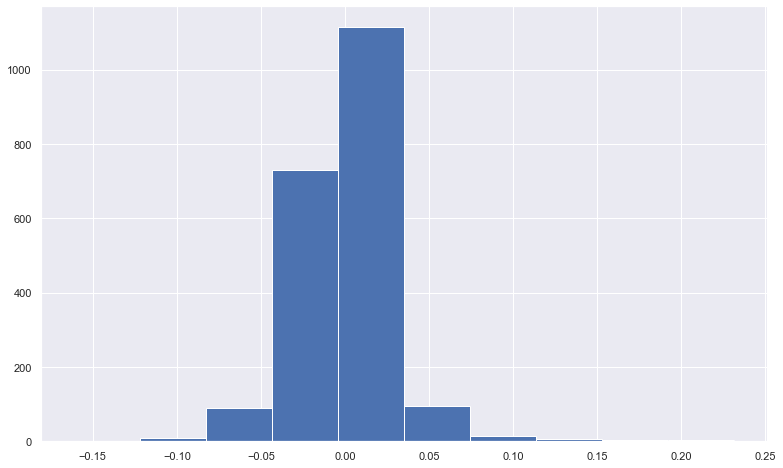

In [72]:
lm = LinearRegression()
lm.fit(x_train, y_train)
residuals = y_train - lm.predict(x_train)
plt.hist(residuals)

In [73]:
print('R^2 is equal to %.3f' %(lm.score(x_train, y_train)))
print('RSS is equal to %.3f' %(np.sum(residuals**2)))
print('The intercept is %.3f' %(lm.intercept_))
print('The slopes are %s' %(lm.coef_))

print('R^2 is equal to %.3f' %(lm.score(x_test, y_test)))
print('RSS is equal to %.3f' %(np.sum(residuals**2)))
print('The intercept is %.3f' %(lm.intercept_))
print('The slopes are %s' %(lm.coef_))

R^2 is equal to 0.923
RSS is equal to 1.608
The intercept is -207965653796.854
The slopes are [ 3.19125789e-01  1.36198431e-02  1.58133431e-01  1.05304422e-01
  7.28062312e-02  8.76819736e-02 -3.61891646e-02  3.06835395e-03
  4.82239506e-03 -4.24234116e-02 -6.17608570e-02  3.32098055e-02
  5.15922728e-02  1.95487925e-02 -2.35888008e-03  1.09470167e-02
  3.26098401e-02 -6.94464049e-02 -2.35330982e-03 -2.91660606e-02
  1.43946971e-02  1.32943144e-02  2.74172084e-02  1.04143798e-02
 -4.44024816e-03  2.00491759e+11  1.22887649e-03  1.31595195e-02
 -2.03142763e-03  2.13127132e-02 -5.73281447e-03 -5.99750079e-03
  1.08021710e-02 -5.39738659e-03 -4.33652773e-03 -6.94419992e-03
  4.00033561e-02  2.01133382e-02  1.67552591e-03 -2.88638324e-03
  7.55680116e-03 -5.87799750e-03  1.71931278e-02  3.74495778e-02
 -3.21864078e-03 -4.99511167e-03  3.86030654e-03 -3.77776186e-03
  4.54763608e-03 -2.68063214e-03  7.47389479e+09  7.47389479e+09
  7.47389479e+09  7.47389479e+09  7.47389479e+09  7.47389479e

In [74]:
#print('negative slope column names %s' %(housing1_train.columns[lm.coef_<0]))
#print('positive slope column names %s' %(housing1_train.columns[lm.coef_>0]))

In [75]:
import statsmodels.api as sm
x = sm.add_constant(x_train)

model = sm.OLS(y_train, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     241.7
Date:                Thu, 08 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:46:13   Log-Likelihood:                 4464.6
No. Observations:                2063   AIC:                            -8731.
Df Residuals:                    1964   BIC:                            -8174.
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.01

In [76]:
y_train_pred = lm.predict(x_train)
metrics.r2_score(y_true = y_train, y_pred = y_train_pred)

y_test_pred = lm.predict(x_test)
# r2 score for the test set
metrics.r2_score(y_true = y_test, y_pred = y_test_pred)


-3.6688398852005207e+18

In [77]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [78]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}
ridge = Ridge()

In [79]:
folds = 5
model_cv = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='r2',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)

model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [80]:
ridge_results = pd.DataFrame(model_cv.cv_results_)
ridge_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008117,0.001620,0.003030,0.000284,0.0001,{'alpha': 0.0001},0.913124,0.913676,0.912876,0.896527,0.916216,0.910484,0.007079,14,0.923840,0.923805,0.924084,0.928367,0.923462,0.924712,0.001839
1,0.014374,0.007733,0.006595,0.002240,0.001,{'alpha': 0.001},0.913133,0.913682,0.912883,0.896523,0.916215,0.910487,0.007082,13,0.923840,0.923805,0.924084,0.928367,0.923462,0.924712,0.001839
2,0.006880,0.001987,0.003553,0.002242,0.01,{'alpha': 0.01},0.913227,0.913739,0.912949,0.896483,0.916204,0.910520,0.007112,12,0.923839,0.923804,0.924084,0.928367,0.923462,0.924711,0.001839
3,0.004727,0.000140,0.002226,0.000068,0.05,{'alpha': 0.05},0.913613,0.913976,0.913230,0.896305,0.916151,0.910655,0.007246,11,0.923829,0.923797,0.924076,0.928361,0.923456,0.924704,0.001839
4,0.004787,0.000173,0.002140,0.000075,0.1,{'alpha': 0.1},0.914032,0.914241,0.913553,0.896080,0.916079,0.910797,0.007408,10,0.923800,0.923775,0.924053,0.928344,0.923439,0.924682,0.001841


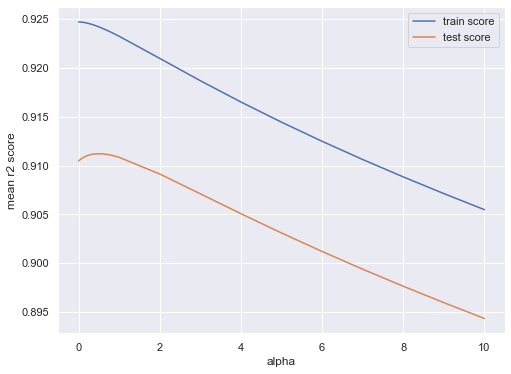

In [81]:
# mean of Train score
plt.figure(figsize=(8,6))
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
# mean of the Test score
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.legend(['train score', 'test score'])
plt.xlabel('alpha')
plt.ylabel('mean r2 score')
plt.show()

In [82]:
model_ridge = Ridge(alpha=2)
model_ridge.fit(x_train, y_train)


Ridge(alpha=2)

In [83]:
y_train_pred = model_ridge.predict(x_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))


0.9207471586293563


In [84]:
y_test_pred = model_ridge.predict(x_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

0.8678733321286004


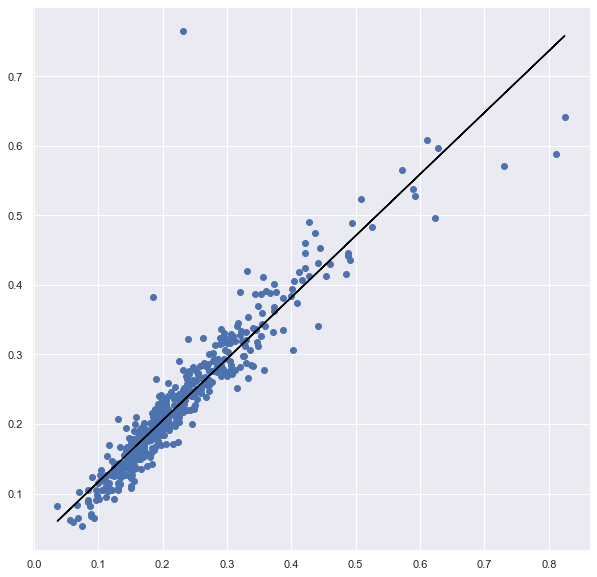

In [86]:
fig = plt.figure(figsize = (10, 10))
plt.scatter(x = y_test, y = y_test_pred)
m, b = np.polyfit(y_test, y_test_pred, 1)
plt.plot(y_test, m*y_test+b, color='black')

In [87]:
# Coefficients list
model_ridge_parameters = list(model_ridge.coef_)
model_ridge_parameters.insert(0, model_ridge.intercept_)
model_ridge_parameters = [round(i,3) for i in model_ridge_parameters]

cols = x_train.columns
cols = cols.insert(0,'constant')
ridge_param_list = list(zip(cols, model_ridge_parameters))
ridge_param_list

[('constant', 0.019),
 ('GrLivArea', 0.236),
 ('LotFrontage', 0.021),
 ('LotArea', 0.087),
 ('OverallQual', 0.104),
 ('MasVnrArea', 0.071),
 ('TotalBsmtSF', 0.1),
 ('LowQualFinSF', -0.017),
 ('FullBath', 0.023),
 ('HalfBath', 0.013),
 ('BedroomAbvGr', -0.023),
 ('KitchenAbvGr', -0.053),
 ('Fireplaces', 0.04),
 ('GarageArea', 0.056),
 ('WoodDeckSF', 0.024),
 ('OpenPorchSF', 0.007),
 ('EnclosedPorch', 0.005),
 ('ScreenPorch', 0.028),
 ('Building Age', -0.046),
 ('Remod_Age', -0.005),
 ('MSZoning_A (agr)', -0.001),
 ('MSZoning_I (all)', 0.0),
 ('MSZoning_RL', 0.013),
 ('BsmtQual_Ex', 0.028),
 ('BsmtQual_Fa', 0.007),
 ('BsmtQual_Gd', -0.003),
 ('BsmtQual_None', 0.006),
 ('LotConfig_Inside', 0.0),
 ('Neighborhood_BrkSide', 0.009),
 ('Neighborhood_CollgCr', -0.005),
 ('Neighborhood_Crawfor', 0.021),
 ('Neighborhood_Edwards', -0.008),
 ('Neighborhood_Gilbert', -0.01),
 ('Neighborhood_IDOTRR', 0.005),
 ('Neighborhood_Mitchel', -0.006),
 ('Neighborhood_NAmes', -0.006),
 ('Neighborhood_NWAmes', 

In [88]:
ridge_params_df = pd.DataFrame({'Params':cols, 'Coef':model_ridge_parameters})
(ridge_params_df.sort_values('Coef', ascending=False)).head(15)

,Params,Coef
1,GrLivArea,0.236
4,OverallQual,0.104
6,TotalBsmtSF,0.100
3,LotArea,0.087
5,MasVnrArea,0.071
13,GarageArea,0.056
97,SaleCondition_Partial,0.047
37,Neighborhood_NoRidge,0.042
12,Fireplaces,0.040
83,KitchenQual_Ex,0.039


In [123]:
feature_importance_ridge = ridge_params_df.sort_values('Coef',ascending=False)[0:15]
feature_importance_ridge 

,Params,Coef
1,GrLivArea,0.236
4,OverallQual,0.104
6,TotalBsmtSF,0.100
3,LotArea,0.087
5,MasVnrArea,0.071
13,GarageArea,0.056
97,SaleCondition_Partial,0.047
37,Neighborhood_NoRidge,0.042
12,Fireplaces,0.040
83,KitchenQual_Ex,0.039


<AxesSubplot:xlabel='Coef', ylabel='Params'>

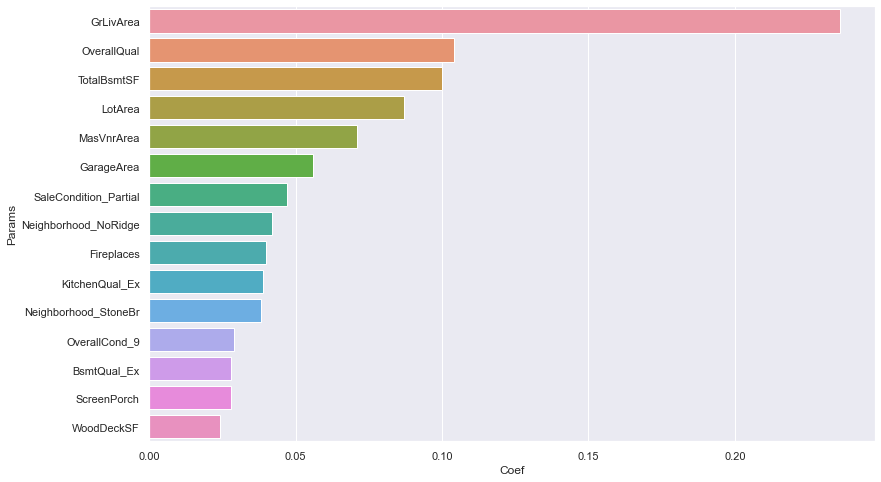

In [124]:
sns.barplot(data=feature_importance_ridge, x="Coef", y="Params")

In [90]:
from sklearn.linear_model import Lasso

In [91]:
params = {'alpha': [0.000001,0.00001,0.0001,0.001, 0.01, 1.0,2]}


In [92]:
lasso = Lasso()

In [93]:
model_cv = GridSearchCV(estimator=lasso, param_grid=params,scoring='r2',cv=folds,return_train_score=True,verbose=1)

model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 1.0, 2]},
             return_train_score=True, scoring='r2', verbose=1)

In [94]:
lasso_results = pd.DataFrame(model_cv.cv_results_)
lasso_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.140823,0.035512,0.002506,0.000686,0.000001,{'alpha': 1e-06},0.913238,0.913830,0.912957,0.896456,0.916267,0.910550,0.007143,2,0.923836,0.923798,0.924078,0.928363,0.923457,0.924706,0.001839
1,0.033884,0.001535,0.002502,0.000329,0.00001,{'alpha': 1e-05},0.913810,0.914826,0.913564,0.895884,0.916028,0.910822,0.007519,1,0.923694,0.923650,0.923949,0.928232,0.923337,0.924573,0.001840
2,0.010421,0.000586,0.002244,0.000040,0.0001,{'alpha': 0.0001},0.914165,0.911844,0.916047,0.886123,0.911234,0.907882,0.011014,3,0.918578,0.918619,0.919388,0.923637,0.918683,0.919781,0.001951
3,0.006728,0.000116,0.002236,0.000098,0.001,{'alpha': 0.001},0.864756,0.872424,0.891910,0.838015,0.864140,0.866249,0.017323,4,0.868708,0.877094,0.873195,0.881445,0.873046,0.874698,0.004293
4,0.005943,0.000414,0.002994,0.001340,0.01,{'alpha': 0.01},0.348873,0.434637,0.425212,0.403263,0.403038,0.403004,0.029746,5,0.396448,0.418254,0.398248,0.428154,0.421352,0.412491,0.012785


In [95]:
lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('int32')

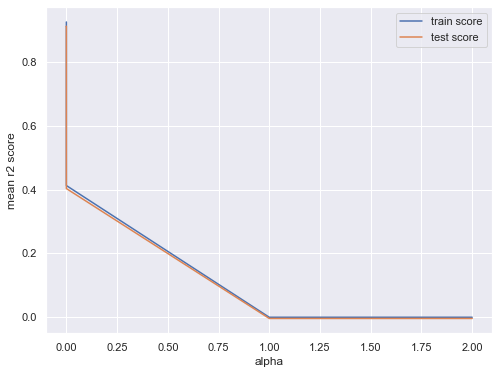

In [96]:
# mean of Train score
plt.figure(figsize=(8,6))
plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
# mean of the Test score
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])

plt.legend(['train score', 'test score'])
plt.xlabel('alpha')
plt.ylabel('mean r2 score')
plt.show()

In [97]:
model_lasso = Lasso(0.002)
model_lasso.fit(x_train, y_train)

Lasso(alpha=0.002)

In [98]:
y_train_pred = model_lasso.predict(x_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

0.8323472215918927


In [99]:
y_test_pred = model_lasso.predict(x_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

0.7898138317017928


In [100]:
# Coefficients list
model_lasso_parameters = list(model_lasso.coef_)
model_lasso_parameters.insert(0, model_lasso.intercept_)
model_lasso_parameters = [round(i,3) for i in model_lasso_parameters]

cols = x_train.columns
cols = cols.insert(0,'constant')
lasso_param_list = list(zip(cols, model_lasso_parameters))
lasso_param_list

lasso_params_df = pd.DataFrame({'Params':cols, 'Coef':model_lasso_parameters})
lasso_params_df = lasso_params_df.loc[lasso_params_df['Coef'] != 0]
lasso_params_df.sort_values('Coef',ascending=False)



,Params,Coef
1,GrLivArea,0.191
4,OverallQual,0.097
0,constant,0.088
23,BsmtQual_Ex,0.048
83,KitchenQual_Ex,0.035
6,TotalBsmtSF,0.030
13,GarageArea,0.027
74,BsmtExposure_Gd,0.015
22,MSZoning_RL,0.014
79,BsmtFinType1_GLQ,0.014


In [101]:
feature_importance = lasso_params_df.sort_values('Coef',ascending=False)[0:10]
feature_importance 

,Params,Coef
1,GrLivArea,0.191
4,OverallQual,0.097
0,constant,0.088
23,BsmtQual_Ex,0.048
83,KitchenQual_Ex,0.035
6,TotalBsmtSF,0.030
13,GarageArea,0.027
74,BsmtExposure_Gd,0.015
22,MSZoning_RL,0.014
79,BsmtFinType1_GLQ,0.014


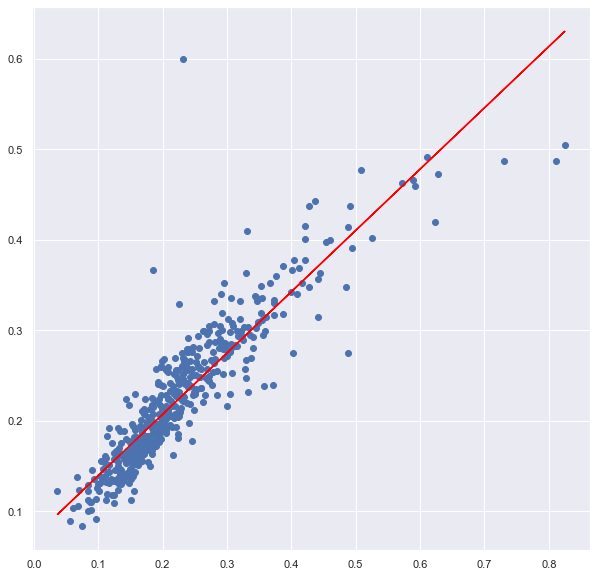

In [102]:
fig = plt.figure(figsize = (10, 10))
plt.scatter(x = y_test, y = y_test_pred)
m, b = np.polyfit(y_test, y_test_pred, 1)
plt.plot(y_test, m*y_test+b, color='red')

In [103]:
from sklearn.tree import DecisionTreeRegressor

DT= DecisionTreeRegressor()
parameters = {
'criterion' : ["squared_error","absolute_error"],
'min_samples_split' : [2,4,6,8],
'min_samples_leaf': [1,2,3,4,5],
}
from sklearn.model_selection import GridSearchCV
grid_search_cv = GridSearchCV(estimator=DT, param_grid=parameters, cv=5, n_jobs =-1)
grid_search_cv.fit(x_train, y_train)
grid_search_cv.best_params_

{'criterion': 'squared_error', 'min_samples_leaf': 5, 'min_samples_split': 4}

In [104]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

model2 =  DecisionTreeRegressor()
model2.fit(x_train, y_train)
y_pred_dt = grid_search_cv.predict(x_test)

cv = KFold(n_splits = 3, shuffle = True,random_state = 30)
score_dt = r2_score(y_test, y_pred_dt)
print("R2 Score:",score_dt)
rmse = cross_val_score(model2,x_train,y_train,cv = cv)
print("Root Mean squared error:" ,np.mean(rmse))

R2 Score: 0.7622235935702643
Root Mean squared error: 0.7738249589937936


In [105]:
sorted_importance_DT = sorted(zip(housing1.columns, model2.feature_importances_), key=lambda t:t[1], reverse=True)


Text(0.5, 1.0, 'feature importance of a gbm classifier')

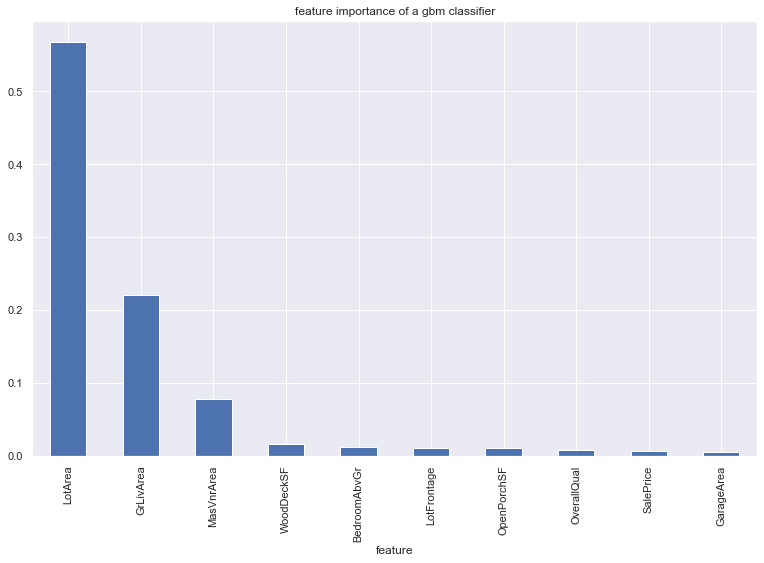

In [106]:
a, b = zip(*sorted_importance_DT)
importance_score = pd.DataFrame({'feature':a, 'score':b})
importance_score = importance_score[0:10]
importance_score.plot.bar(x='feature', y='score', legend=None)
plt.title('feature importance of a gbm classifier')



In [107]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

model4 =  GradientBoostingRegressor()
model4.fit(x_train, y_train)

y_pred_gb = model4.predict(x_test)

cv = KFold(n_splits = 10, shuffle = True,random_state = 30)
score_gb = round(r2_score(y_test, y_pred_gb), 3)
print("R2 Score:",score_gb)
rmse = cross_val_score(model4,x_train,y_train,cv = cv)
print("Root Mean squared error:",np.mean(rmse))

print('Training Accuracy %.2f' %(model4.score(x_train, y_train)))
print('Testing Accuracy %.2f' %(model4.score(x_test, y_test)))

R2 Score: 0.828
Root Mean squared error: 0.9195798405100788
Training Accuracy 0.96
Testing Accuracy 0.83


In [108]:
sorted_importance = sorted(zip(housing1.columns, model4.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance


[('LotArea', 0.49627137909270286),
 ('GrLivArea', 0.15586361646149183),
 ('MasVnrArea', 0.08433670388638075),
 ('BedroomAbvGr', 0.05032814642020747),
 ('WoodDeckSF', 0.039318038590850576),
 ('LotFrontage', 0.03059203368201868),
 ('1stFlrSF', 0.02313622848977641),
 ('PoolArea', 0.022473972844996852),
 ('HalfBath', 0.015446555462989047),
 ('OverallQual', 0.012361064403856134),
 ('OpenPorchSF', 0.011888212158097473),
 ('Exterior1st_Wd Sdng', 0.011569524592945512),
 ('Exterior2nd_PreCast', 0.006115613589865506),
 ('Exterior1st_HdBoard', 0.004672626702921223),
 ('ScreenPorch', 0.0033645545968570595),
 ('Exterior2nd_VinylSd', 0.002761077187170277),
 ('MSZoning_I (all)', 0.0023002849036510187),
 ('Exterior2nd_Plywood', 0.0021738286982772854),
 ('BsmtExposure_No', 0.0021019409632708013),
 ('2ndFlrSF', 0.0018559069491990358),
 ('GarageArea', 0.0017916366660924784),
 ('KitchenAbvGr', 0.0017752645493928963),
 ('ExterQual_TA', 0.0016264520978381263),
 ('BsmtFinType1_GLQ', 0.001328795431997513),
 (

Text(0.5, 1.0, 'feature importance')

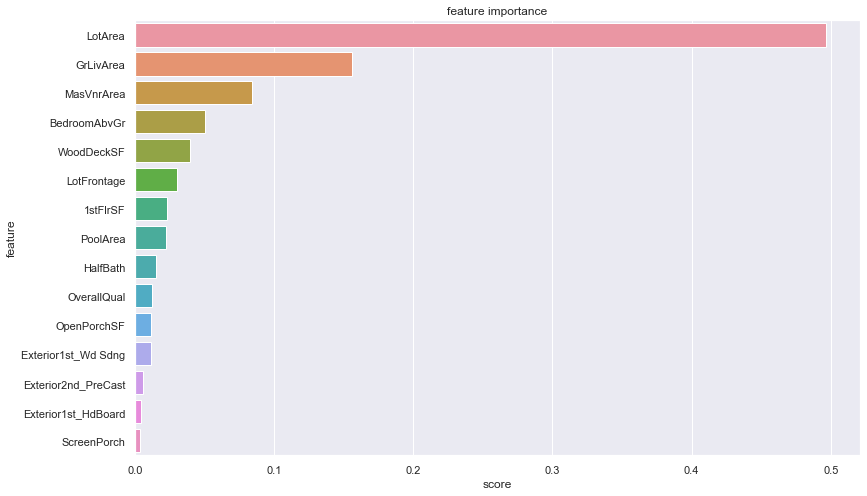

In [122]:
a, b = zip(*sorted_importance)
importance_score = pd.DataFrame({'feature':a, 'score':b})
importance_score= importance_score[0:15]
importance_score
#importance_score.plot.bar(x='feature', y='score', legend=None)
sns.barplot(data=importance_score, x='score', y='feature')
plt.title('feature importance')
